<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg">
<center>
<p>
<h1>Algorítmica Avanzada</h1>
<h2>Problemas 3.A - Programación Dinámica </h2>
</center>
</p>
</div>

<div class="alert alert-danger" style="width:95%; margin:0 auto; padding">
A la hora de crear las matrices de programación dinámica podéis emplear diversas estructuras de datos. A la hora de gestionar matrices, la lista de listas puede ser una buena opción, pero existen librerías como NumPy que hacen una mejor gestión de las matrices.

Podéis consultar aquí la documentación: https://docs.scipy.org/doc/numpy/reference/

<div class="alert alert-success" style="width:90%; margin:0 auto;">

  <h2><p>1- El problema de la mochila</p></h2>
  
  <p> En esta primera sección trabajaremos con el problema de la mochila que ya vimos en los problemas de Greedy. Refrequemos un poco:
</p>
  <center><img src="img/knapsack.png" width=30%></center>
  
  <p>
    Nos encontramos en una habitación en la que hay $N$ objetos, cada cual con un peso $w_1, w_2, w_3 ... w_N$ y un valor $v_1, v_2, v_3 ... v_N$. Disponemos de una mochila que puede soportar una carga máxima de $W$.
    Se busca conseguir llenar la mochila maximizando el valor total de la misma. Es decir queremos encontrar la combinación de objetos $b$ tal que $\arg_{b} \max{\sum_{i=0}^{N}{v_i · b_i}}$ manteniendo siempre cierto que no superamos el peso máximo de la mochila: $\sum_{i=0}^{N}{(w_i · b_i)}\leq W$.
     
</p>
  
Trabajaremos tres variantes de este problema. En el primero, dispondremos solo de un objeto de cada tipo; en otro dispondremos de una cantidad ilimitada de objetos de cada tipo; finalmente, dispondremos de una cantidad limitada $c_1, c_2, c_3 ... c_N$ de cada objeto.


In [77]:
import numpy as np
import math
#Poner la capacidad maxima entre 100 y 1000 
''' 
Implementa aquí la solución de PD que resuelve el problema de la mochila simple (sin cantidades)
@input: Lista de listas con la forma [peso,valor] representando los objetos que podemos escoger.
@output: Lista de listas con la forma [peso,valor] representando los objetos escogidos.
'''
def dynamic_knapsack(D):
    
    w = 100 #La  capacidad de la mochila es 100
    
    #D.sort() #Ordenamos los items por orden de peso
    print(D)
    
    matriz = np.zeros((len(D)+1,w+1)) #np.zeros mirar funcion para inicializar a 0s
    
    #matriz =[[0 for x in range(w+1)] for x in range(len(D)+1)]
    
    for i in range(1,len(D)+1): #Las columnas que seran los pesos en orden de 1
        for j in range(1,w+1):#Las filas que seran los items ordenados por peso
            if(D[i-1][0]<=j):
                matriz[i][j] = max(D[i-1][1]+matriz[i-1][j-D[i-1][0]],matriz[i-1][w])
            else:
                matriz[i][j]=matriz[i-1][j]
                
    return matriz[len(D)][w]

''' 
Implementa aquí la solución de PD que resuelve el problema de la mochila con cantidad de objetos limitados
@input: Lista de listas con la forma [peso,valor,cantidad] representando los objetos que podemos escoger.
@output: Lista de listas con la forma [peso,valor,cantidad] representando los objetos escogidos.
'''
def dynamic_knapsac_quantities(D):
    
    conjuntos = []
    
    for i in range(len(D)):
        for j in range(D[i][2]):
            conjuntos.append(D[i])
    print(conjuntos)
    print(D)
    
    conjuntos.sort() #Ordenamos los items por orden de peso
    print(conjuntos)
    
    #matriz = np.zeros((len(conjuntos)+1,w+1)) #np.zeros mirar funcion para inicializar a 0s
    matriz =[[0 for x in range(w+1)] for x in range(len(conjuntos)+1)]
    
    for i in range(len(conjuntos)+1): #Las columnas que seran los pesos en orden de 1
        for j in range(w+1):#Las filas que seran los items ordenados por peso
            if(i == 0 or j == 0):
                matriz[i][j]=0;
            elif(conjuntos[i-1][0]<=j):
                matriz[i][j] = max(conjuntos[i-1][1]+matriz[i-1][j-conjuntos[i-1][0]],matriz[i-1][w])
            else:
                matriz[i][j]=matriz[i-1][j]
                
    return matriz[len(conjuntos)][w]

''' 
Implementa aquí la solución de PD que resuelve el problema de la mochila con cantidad de objetos ilimitados
@input: Lista de listas con la forma [peso,valor] representando los objetos que podemos escoger.
@output: Lista de listas con la forma [peso,valor,cantidad] representando los objetos escogidos.
'''
def dynamic_kapsac_infinite(D):
    
    w = 100
    conjuntos = []
    
    for i in range(len(D)):
        for j in range(math.floor(w/D[i][0])):
            conjuntos.append(D[i])
            
    print(conjuntos)
    
    matriz = np.zeros((len(conjuntos)+1,w+1)) #np.zeros mirar funcion para inicializar a 0s
    #matriz =[[0 for x in range(w+1)] for x in range(len(conjuntos)+1)]
    
    for i in range(len(conjuntos)+1): #Las columnas que seran los pesos en orden de 1
        for j in range(w+1):#Las filas que seran los items ordenados por peso
            if(i == 0 or j == 0):
                matriz[i][j]=0;
            elif(conjuntos[i-1][0]<=j):
                matriz[i][j] = max(conjuntos[i-1][1]+matriz[i-1][j-conjuntos[i-1][0]],matriz[i-1][w])
            else:
                matriz[i][j]=matriz[i-1][j]
                
    return matriz[len(conjuntos)][w]


In [78]:
from utils import random_objects
# random_objects genera una lista de objetos, 
# cada uno representado como [peso,valor] o [peso,valor,cantidad].
# Su único parámetro es un booleano opcional que indica si la 
# cantidad de objetos es finita (False) o infinita (True, por defecto)

D = random_objects()

print(dynamic_kapsac_infinite(D))

[[2, 74], [2, 74], [2, 74], [2, 74], [2, 74], [2, 74], [2, 74], [2, 74], [2, 74], [2, 74], [2, 74], [2, 74], [2, 74], [2, 74], [2, 74], [2, 74], [2, 74], [2, 74], [2, 74], [2, 74], [2, 74], [2, 74], [2, 74], [2, 74], [2, 74], [2, 74], [2, 74], [2, 74], [2, 74], [2, 74], [2, 74], [2, 74], [2, 74], [2, 74], [2, 74], [2, 74], [2, 74], [2, 74], [2, 74], [2, 74], [2, 74], [2, 74], [2, 74], [2, 74], [2, 74], [2, 74], [2, 74], [2, 74], [2, 74], [2, 74], [4, 90], [4, 90], [4, 90], [4, 90], [4, 90], [4, 90], [4, 90], [4, 90], [4, 90], [4, 90], [4, 90], [4, 90], [4, 90], [4, 90], [4, 90], [4, 90], [4, 90], [4, 90], [4, 90], [4, 90], [4, 90], [4, 90], [4, 90], [4, 90], [4, 90], [8, 54], [8, 54], [8, 54], [8, 54], [8, 54], [8, 54], [8, 54], [8, 54], [8, 54], [8, 54], [8, 54], [8, 54], [15, 69], [15, 69], [15, 69], [15, 69], [15, 69], [15, 69], [29, 72], [29, 72], [29, 72], [40, 45], [40, 45], [43, 17], [43, 17], [46, 43], [46, 43], [47, 6], [47, 6], [49, 56], [49, 56]]
7125


<div class="alert alert-warning" style="width:80%; margin:0 auto; padding">
<center><p><h3> Cuestiones</h3></p> </center> </div>

<ul>
    <li>¿En qué casos se encuentra solución óptima al problema?</li>
    <li>Explica las soluciones planteadas y analiza su complejidad. Comparalo con las implementaciones greedy.</li>
</ul>

__Escribe aquí tus respuestas__

<h4> Pregunta 1:  Si existe una solución mejor para el problema correspondiente, entonces es mejor que para el problema mochila(1, n, C), en contra de la hipótesis. Lo mismo se cumple en cualquier etapa de decisión. </h4>

<h4> Pregunta 2: la Complejidad sera de W*Item ya que se itera sobre los Items y el range que genera W</h4>

<div class="alert alert-success" style="width:90%; margin:0 auto;">

  <h2><p>2 - Algoritmo Floyd-Warshall</p></h2>
  
  <p> El algoritmo Floyd-Warshall es un algoritmo de programación dinámica que se emplea para encontrar los caminos mínimos en un grafo con pesos (que no tenga ciclos negativos) entre todos los pares de nodos. Se basa en ir construyendo una matriz con caminos intermedios entre trios de nodos. Podéis ver más información y consultar el pseudocódigo <a href="https://es.wikipedia.org/wiki/Algoritmo_de_Floyd-Warshall">aquí</a>.</p>


In [2]:
import numpy as np
''' 
Implementa aquí el algoritmo Floyd Warshall
'''
def floyd_warshall(G):
    
    n = len(G.nodes)

    matriz = np.full((n,n),np.inf) #Hay que asignar infininitos
    
    #print(matriz)
    
    for edge in G.edges: #Inicializamos los pesos en los nodos pertenecientes
        x = int(edge[0])
        y = int(edge[1])
        matriz[x][y] = G[x][y]['weight']
        matriz[y][x] = G[x][y]['weight']
        
    for k in range(n):
        for i in range(n):
            for j in range(n):
                if(matriz[i][j] > matriz[i][k] + matriz[k][j]):
                    matriz[i][j] = matriz[i][k] + matriz[k][j]
                    
    return matriz

[(0, 8), (0, 13), (1, 5), (1, 25), (1, 18), (1, 2), (2, 26), (2, 15), (2, 5), (2, 9), (2, 14), (3, 11), (3, 27), (3, 28), (4, 5), (4, 23), (4, 13), (4, 6), (5, 15), (5, 6), (6, 25), (6, 19), (6, 18), (8, 18), (8, 16), (9, 17), (9, 29), (10, 13), (10, 16), (10, 18), (10, 21), (10, 23), (11, 13), (11, 24), (12, 13), (12, 23), (12, 21), (12, 20), (13, 28), (13, 21), (13, 19), (13, 17), (14, 16), (14, 25), (14, 26), (15, 16), (15, 20), (16, 18), (16, 29), (18, 21), (18, 22), (18, 24), (19, 27), (20, 24), (20, 23), (20, 25), (21, 24), (21, 26), (23, 28), (23, 29)]
6
6.0


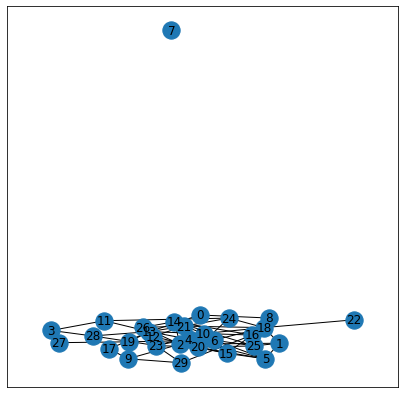

In [10]:
from utils import random_graph, draw_graph, draw_path
from utils import *
from networkx import floyd_warshall as testeo
#random_graph(N,E) genera un grafo aleatorio con N vértices y E aristas.
#                   Podéis asumir que los ids de los nodos serán enteros del 0 a N-1
#draw_graph(G,s) #dibuja el grafo G, el parámetro opcional s indica el tamaño del dibujo.
#draw_path(G,p,s) #igual que draw_graph pero destacando las aristas que forman el path.

# Prueba aquí tu algoritmo.
G = random_graph(30,60)
draw_graph(G)

t =testeo(G)
f = floyd_warshall(G)

print(t[2][4])
print(f[2][4])

<div class="alert alert-warning" style="width:80%; margin:0 auto; padding">
<center><p><h3> Cuestiones</h3></p> </center> </div>

<ul>
    <li>Analiza la complejidad del algoritmo. És O(V^3), ya que hace una triple iteracion de el numero de vertices que tiene el grafo, ya que busca la distancia minima para llegar desde un nodo a otro llenando la matriz y por eso k cuando acaba es que ya a visitado todas las distancias posibles para llegar al nodo destino con la minima distancia, este algoritmo es menos efectivo en dijkstra pero es una buena opcion para grafos con una gran densidad</li>
</ul>